###  Topic: US.Regional Analysis of Medical Insurance cost
    
        College: Mt San Antonio College
        Course: CISD41 Introduction to Data Science
        By: Tayyaba Fatima
        Data Source: Kaggle.com
 * link 
 (['kaggle kernels output mariapushkareva/medical-insurance-cost-with-linear-regression -p /path/to/dest'])
      
#### Purpose

* Medical Insurance is an important expenditure throughout individual's life. This will enhance individual's knowledge of United States Medical Insurance charges and related economic information.
* Learn Python data analysis tools.

#### Overview
    Importing Data
    Cleaning and Organizing the Data
    Descriptive Statistic
    Correlation
    Pivot tables
    Functions
    Data Visualization
    Quantitative Data Exploratory
    Correlation, Coefficients, P-values
    Testing Hypothesis, ANOVA
    Chisquare, ANOVA, Normal-test, Z-test, Pearson Correlation
    Summary and Conclusion
    References
    
#### Attributes
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

* Age:  age of primary beneficiary

* Sex:  Beneficiary gender, female = 1, male = 0

* Bmi:  Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9


* Children:  Number of children covered by health insurance / Number of dependents

* Smoker:  Smoking if person(Beneficiary) smokes its 1 and if person don't smoke its 0

* Region:  The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
* Charges: cost of Insurance In dollars per year.


### IMPORTING DATA

In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot,iplot
import scipy.stats as st
from scipy import stats
from scipy.stats import normaltest
from statsmodels.stats.weightstats import ztest
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
init_notebook_mode(connected = True)
cf.go_offline()

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
#let's load the data and save it into df dataframe.
df = pd.read_csv("data\insurance.csv")

In [4]:
#showing the head of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#showing the tail of the dataframe
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### CLEANING  AND  ORGANISING DATA

In [6]:
#getting the number of rows and columns
df.shape

(1338, 7)

In [7]:
#showing the info of dataframe df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#let's see the data types of  columns of the df dataframe
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#let's check if the dataframe has any null value
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

My data is clean with no null value

In [10]:
# let's change the data type for region
df[['region']] = df[['region']].astype('string')
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       string
charges     float64
dtype: object

In [11]:
# let's check the number of unique value for region,sex and smoker column column
df[['region','sex','smoker','children']].nunique()


region      4
sex         2
smoker      2
children    6
dtype: int64

In [12]:
#let's check the unique values for sex coumn
df['region'].unique()

<StringArray>
['southwest', 'southeast', 'northwest', 'northeast']
Length: 4, dtype: string

In [13]:
#let's check the unique value for smoker coumn
df['sex'].unique()

array(['female', 'male'], dtype=object)

#### FUNCTION

In [14]:
#implementing function for the region column to replace the values with the new one.
def letter(x):
    if x == 'northeast':
        return 'North East'
    elif x == 'southeast':
        return 'South East'
    elif x == 'northwest':
        return 'North West'
    elif x == 'southwest':
        return 'South West'
    else:
        return x

In [15]:
#defining the function to chnage values from string to number 
#for ex: for no and male its 0 and for yes and female it's 1
def smoke(x):
        if (x == 'no')| (x =='male'):
             return 0
        elif (x == 'yes')| (x =='female'):
             return 1
        else:
            return x


In [16]:
df['region'] = df['region'].apply(letter)

In [17]:
#applying the function to sex smoker column.
df['smoker'] = df['smoker'].apply(smoke)
df['sex'] = df['sex'].apply(smoke)
#showing the head of the dataframe after applying function
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,South West,16884.92400
1,18,0,33.770,1,0,South East,1725.55230
2,28,0,33.000,3,0,South East,4449.46200
3,33,0,22.705,0,0,North West,21984.47061
4,32,0,28.880,0,0,North West,3866.85520


In [18]:
#changing the columns name from lowercase to uppercase.
df.columns = ['Age','Sex','BMI','Children','Smoker','Region','Charges']

In [19]:
#showing the data types after applying the function.
df.dtypes


Age           int64
Sex           int64
BMI         float64
Children      int64
Smoker        int64
Region       object
Charges     float64
dtype: object

In [20]:
#showing the head of the dataframe.
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,1,27.900,0,1,South West,16884.92400
1,18,0,33.770,1,0,South East,1725.55230
2,28,0,33.000,3,0,South East,4449.46200
3,33,0,22.705,0,0,North West,21984.47061
4,32,0,28.880,0,0,North West,3866.85520


#### Descriptive Statistic

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
Sex,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
BMI,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
Children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
Smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
Charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [22]:
df.corr()

,Age,Sex,BMI,Children,Smoker,Charges
Age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
Sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
BMI,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
Children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
Smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
Charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


In [23]:
#Computing the median for Charges.
dem1charges = df['Charges']
np.median(dem1charges)

9382.033

In [24]:
#Computing the standard deviation for charges.
Charges_std = np.std(dem1charges)
Charges_std

12105.484975561605

In [25]:
#Computing the variance for charges
Charges_var = np.var(dem1charges)
Charges_var

146542766.49354774

In [26]:
Chargespercent = np.percentile(df['Charges'],[25,50,75])
Chargespercent

array([ 4740.28715 ,  9382.033   , 16639.912515])

In [27]:
#let's check if there is any duplicate value
df.duplicated().sum()

1

In [28]:
#dropping the duplicate value.
df.drop_duplicates(inplace=True)

In [29]:
#checking it again if there is any duplicate value after dropping it.
df.duplicated().sum()

0

### PIVOTING AND GROUPBY

In [30]:
#getting the  pivot table by age
pivot1 = pd.pivot_table(df,index = 'Age')
pivot1

,BMI,Charges,Children,Sex,Smoker
Age,,,,,
18,31.326159,7086.217556,0.449275,0.478261,0.173913
19,28.567164,9868.929428,0.432836,0.492537,0.268657
20,30.632759,10159.697736,0.862069,0.482759,0.310345
21,28.185714,4730.464330,0.785714,0.464286,0.071429
22,31.087679,10012.932802,0.714286,0.464286,0.214286
23,31.454464,12419.820040,1.000000,0.500000,0.250000
24,29.142679,10648.015962,0.464286,0.500000,0.214286
25,29.693929,9838.365311,1.285714,0.464286,0.178571
26,29.428929,6133.825309,1.071429,0.464286,0.107143


In [31]:
gb1 = df.groupby('Children')


In [32]:
gb1.first(6)

,Age,Sex,BMI,Smoker,Charges
Children,,,,,
0,19,1,27.90,1,16884.9240
1,18,0,33.77,0,1725.5523
2,37,0,29.83,0,6406.4107
3,28,0,33.00,0,4449.4620
4,25,0,33.66,0,4504.6624
5,19,1,28.60,0,4687.7970


In [33]:
#grouping the data by the regions.
gb = df.groupby('Region')

In [34]:
#showing the data after grouping it
gb.first()

,Age,Sex,BMI,Children,Smoker,Charges
Region,,,,,,
North East,37,0,29.830,2,0,6406.41070
North West,33,0,22.705,0,0,21984.47061
South East,18,0,33.770,1,0,1725.55230
South West,19,1,27.900,0,1,16884.92400


In [35]:
#making the group for region Northeast.
dfgroupne = gb.get_group('North East')

In [36]:
dfgroupNE = dfgroupne.set_index('Region')
#showing the head of the northeast grouped data.
dfgroupNE.head()

,Age,Sex,BMI,Children,Smoker,Charges
Region,,,,,,
North East,37,0,29.830,2,0,6406.41070
North East,25,0,26.220,0,0,2721.32080
North East,52,1,30.780,1,0,10797.33620
North East,23,0,23.845,0,0,2395.17155
North East,60,1,36.005,0,0,13228.84695


In [37]:
#making the group for region Northwest.
dfgroupnw = gb.get_group('North West')

In [38]:
dfgroupNW = dfgroupnw.set_index('Region')
#showing the head of the northwest grouped data.
dfgroupNW.head()

,Age,Sex,BMI,Children,Smoker,Charges
Region,,,,,,
North West,33,0,22.705,0,0,21984.47061
North West,32,0,28.880,0,0,3866.85520
North West,37,1,27.740,3,0,7281.50560
North West,60,1,25.840,0,0,28923.13692
North West,37,0,28.025,2,0,6203.90175


In [39]:
#making the group for region Southeast.
dfgroupse = gb.get_group('South East')

In [40]:
dfgroupSE = dfgroupse.set_index('Region')
#showing the head of the southwest grouped data.
dfgroupSE.head()

,Age,Sex,BMI,Children,Smoker,Charges
Region,,,,,,
South East,18,0,33.77,1,0,1725.5523
South East,28,0,33.00,3,0,4449.4620
South East,31,1,25.74,0,0,3756.6216
South East,46,1,33.44,1,0,8240.5896
South East,62,1,26.29,0,1,27808.7251


In [41]:
#making the group for region Southwest.
dfgroupsw = gb.get_group('South West')

In [42]:
dfgroupSW = dfgroupsw.set_index('Region')
#showing the head of the southwest grouped data.
dfgroupSW.head()

,Age,Sex,BMI,Children,Smoker,Charges
Region,,,,,,
South West,19,1,27.9,0,1,16884.924
South West,23,0,34.4,0,0,1826.843
South West,19,0,24.6,1,0,1837.237
South West,56,0,40.3,0,0,10602.385
South West,30,0,35.3,0,1,36837.467


### DATA VISUALIZATION

###### Question 1: Out of male and female who smokes more?

[Text(0.5, 1.0, 'SEX[1 = Female, 0= Male] vs SMOKER[1 = Yes, 0= No]')]

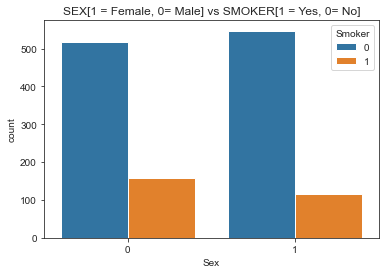

In [43]:
#showing the answer using countplot.
sns.set_style('ticks')
sns.countplot('Sex',data = df,hue = 'Smoker').set(title='SEX[1 = Female, 0= Male] vs SMOKER[1 = Yes, 0= No]')

#### Observation:
  * from the above plot it shows that female smoke less than male

<h2 Observation:
    

###### Question 2: which age group is more in the data?

Text(0.5, 0, '__Age__')

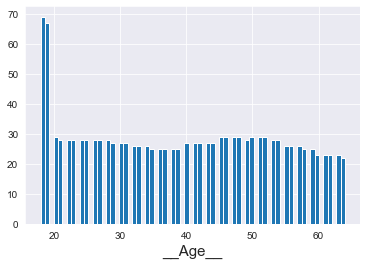

In [44]:
#plotting the histogram for Age
sns.set_style("darkgrid")
df['Age'].hist(bins = 70).set_xlabel('__Age__',fontsize = 15)


#### Observation:
 * from the above plot we get to know that most of the people have ages below 20

##### Question 3: How many males and females are in the data?

In [45]:
#counting  the value for male and female whereas male = 0 and female = 1.
df['Sex'].value_counts()

0    675
1    662
Name: Sex, dtype: int64

###### Question 4:  Out of Young male and female and old male and female who are more in the data?

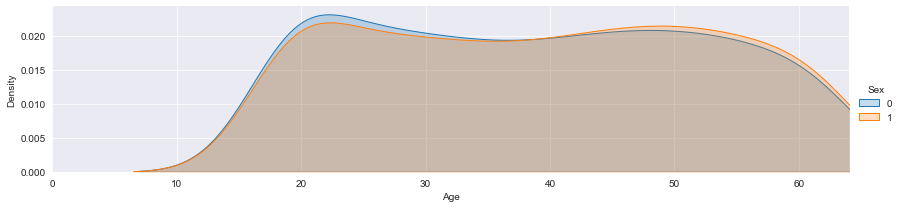

In [46]:
fig  =  sns.FacetGrid(df,  hue="Sex",aspect=4) 
# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice 
fig.map(sns.kdeplot,'Age',shade=  True) 
sns.set_style("darkgrid")
# Set the x max limit by the oldest passenger 
oldest  =  df['Age'].max() 
#Since we know no one can be negative years old set the x lower limit at 0 
fig.set(xlim=(0,oldest)) 
#Finally add a legend 
fig.add_legend() 

#### Observation:
   * from the above plot its clear that young males are more than female but old females are more than old males

 ######  Question 5: Do smoking have an impact on  the medical insurance charges?

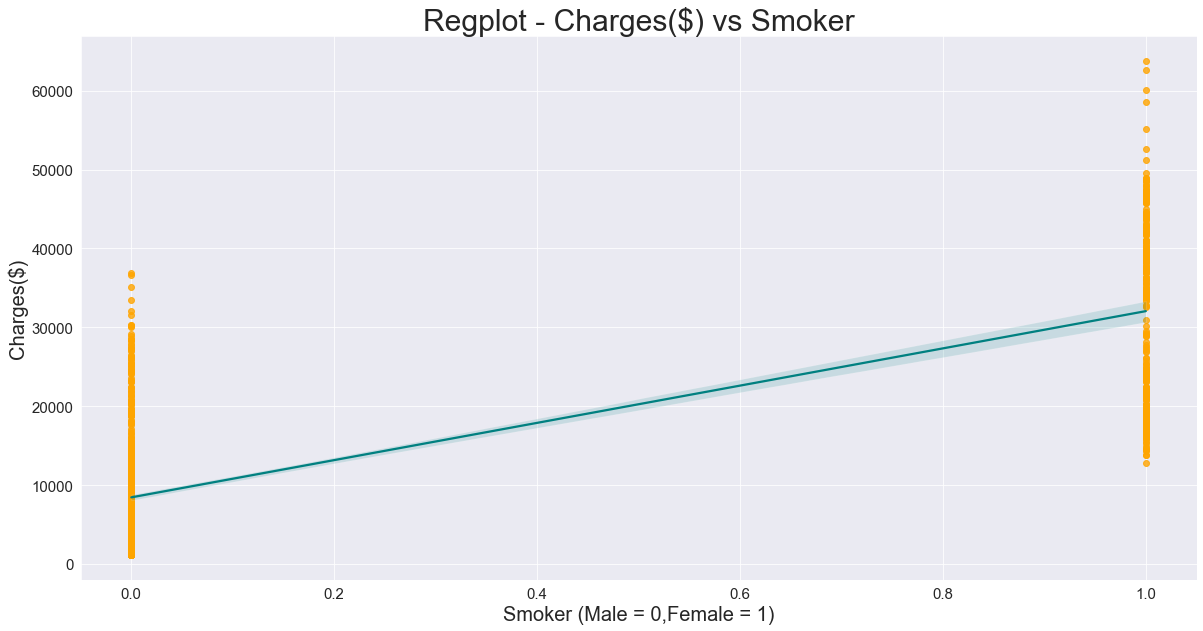

In [47]:
# Regression plot of Charges vs Smokers
plt.figure(figsize=(20,10))
g = sns.regplot(data = df, y = 'Charges', x = 'Smoker', color='orange', line_kws={'color':'teal'})
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
sns.set_style("darkgrid")
# Annotation
plt.xlabel('Smoker (Male = 0,Female = 1)', fontsize=20)
plt.ylabel('Charges($)', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Regplot - Charges($) vs Smoker', fontsize=30)
sns.set_style("darkgrid")

#### Observation:
* Not so surprisingly from the above plot we can see that if person smokes then the charges of insurance are more as Smoking is injurious to health and leads to many diseases.

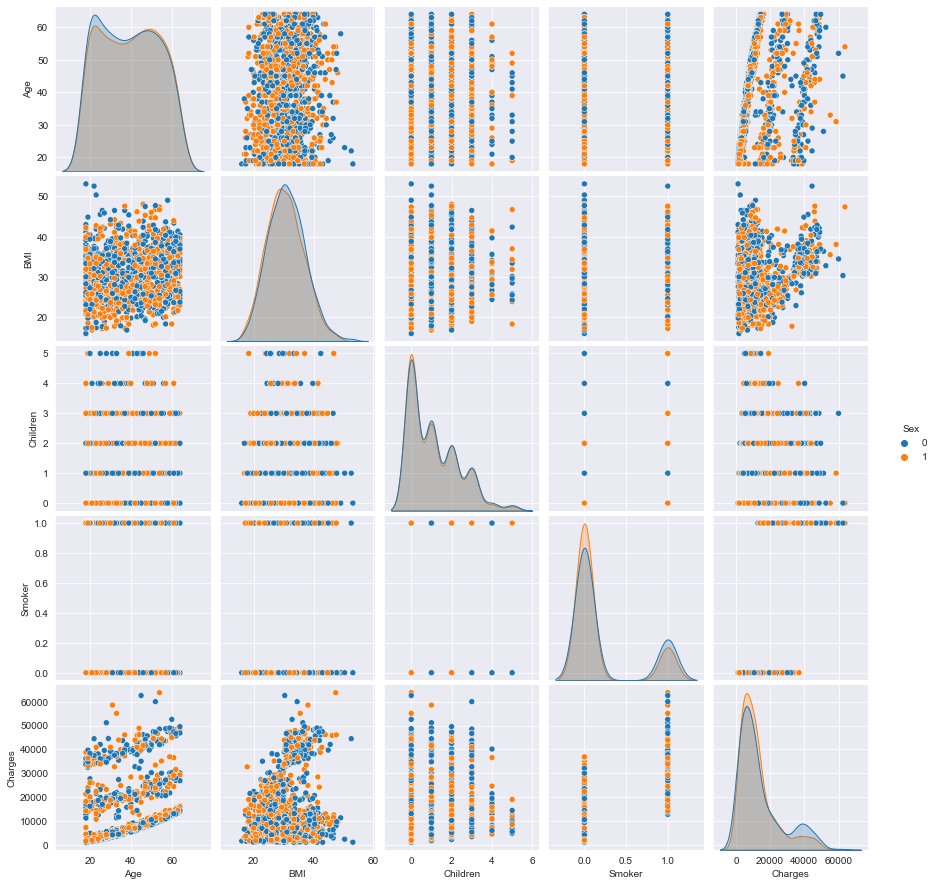

In [48]:
#plotting pairplot for dataframe df with hue Sex
sns.pairplot(df,hue = 'Sex')

Text(0.5, 1.0, 'Charges vs Region')

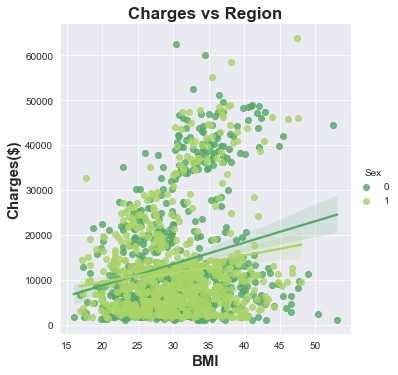

In [49]:
#plotting lmplot for BMI and charges with hue Sex
sns.lmplot(x = 'BMI',y = 'Charges',data = df,hue = 'Sex',palette = 'summer')
plt.xlabel('BMI', fontsize=15,fontweight = 'bold')
plt.ylabel('Charges($)', fontsize = 15,fontweight = 'bold')
plt.title('Charges vs Region',fontsize = 17,fontweight = 'bold')


#### Observation:
 * we can see in the above plot that BMI and charges have weak relationship where as if person smoke there charges are more.where as males have more Charges, BMI than female

##### Question 6: In every  region which age group have more charges?

In [50]:
#plotting iplot for Charges and Age by Region.
df.iplot(kind = 'line',categories = 'Region',x = 'Age',y = 'Charges', xTitle = 'AGE', yTitle = 'Charges',title='CHARGES vs AGE By Region')


#### Observation:
* In North East charges for person above 30 is more
* In North West charges are more for person above 30 and 50 years
* In South East charges are more for a person above 45 and 54
* In South West charges are more for a person above 25 and 60 years
* where as charges continues to Increase by age.

##### Question:
Which region has maximum and minimum smokers?

<AxesSubplot:xlabel='Smoker', ylabel='count'>

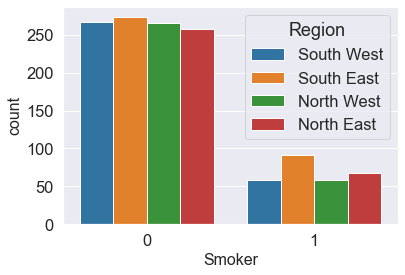

In [51]:
#plotting countplot for Smoker and region
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
sns.countplot('Smoker',data = df,hue = 'Region')

#### Observation:
* from the above plot we can see on top is the South East region which consist of people who smokes
* where as smoker in every region is more than non smokers ,Northwest and Southwest is almost same when it comes to non smoker but have very little diffrence when it comes to smoker category.
* Northeast region have less smokers out of 4 regions.

##### Question 7: Which region have  people with more BMI?

Text(0.5, 1.0, 'Charges vs Region')

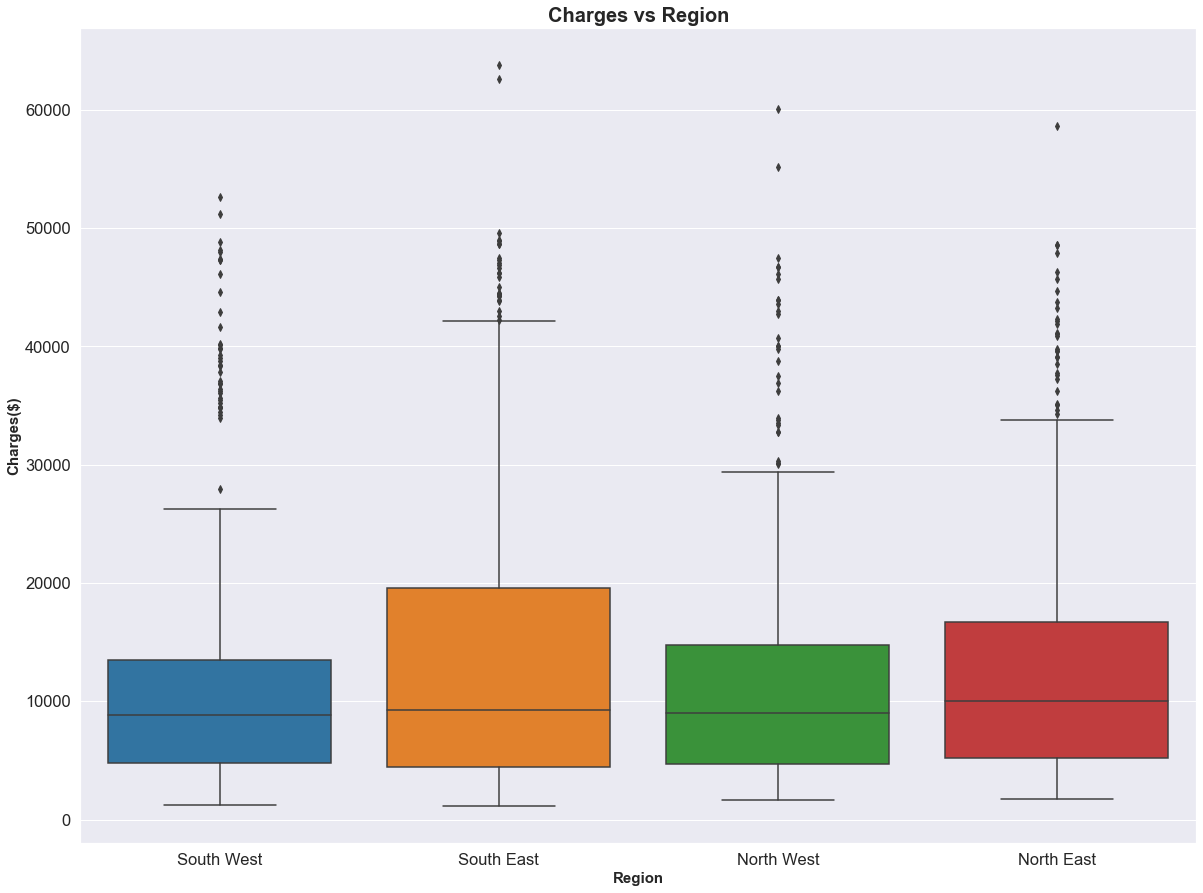

In [52]:
#plotting boxplot for charges and Region.
plt.figure(figsize=(20,15))
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
sns.set_style("darkgrid")
sns.boxplot(data = df, x= 'Region', y = 'Charges').set_title('Charges($) vs Region')
plt.xlabel('Region', fontsize=15,fontweight = 'bold')
plt.ylabel('Charges($)', fontsize = 15,fontweight = 'bold')
plt.title('Charges vs Region',fontsize = 20,fontweight = 'bold')


#### Observation:
* In southeast region people have more Charges out of all regions
* out of All the four regions southwest people have less charges
* Where as there are outliers in every region

<Figure size 1440x720 with 0 Axes>

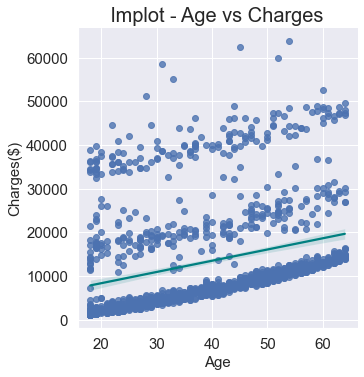

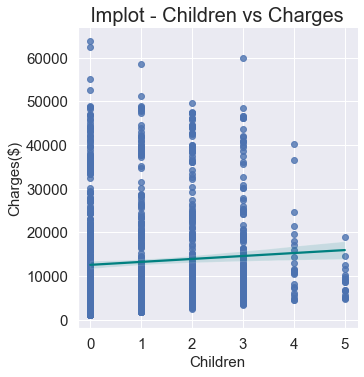

In [53]:
#plotting lmplot for Charges and Age
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")

sns.lmplot(x = 'Age', y = 'Charges', data=df,palette= 'orange',line_kws={'color':'teal'})
plt.xlabel('Age', fontsize=15)
plt.ylabel('Charges($)', fontsize = 15)
plt.title('lmplot - Age vs Charges', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
#plotting lmplot for Children and Charges
sns.set_style("darkgrid")
sns.lmplot(x = 'Children', y = 'Charges', data=df, palette='coolwarm',line_kws={'color':'teal'})
plt.xlabel('Children', fontsize=15)
plt.ylabel('Charges($)', fontsize = 15)
plt.title('lmplot - Children vs Charges', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')




#### Observation
* Children and charges have weak relationship.
* Age and charges are correlated as age increase price also increase.

Text(0.5, 1.0, 'Charges By Sex')

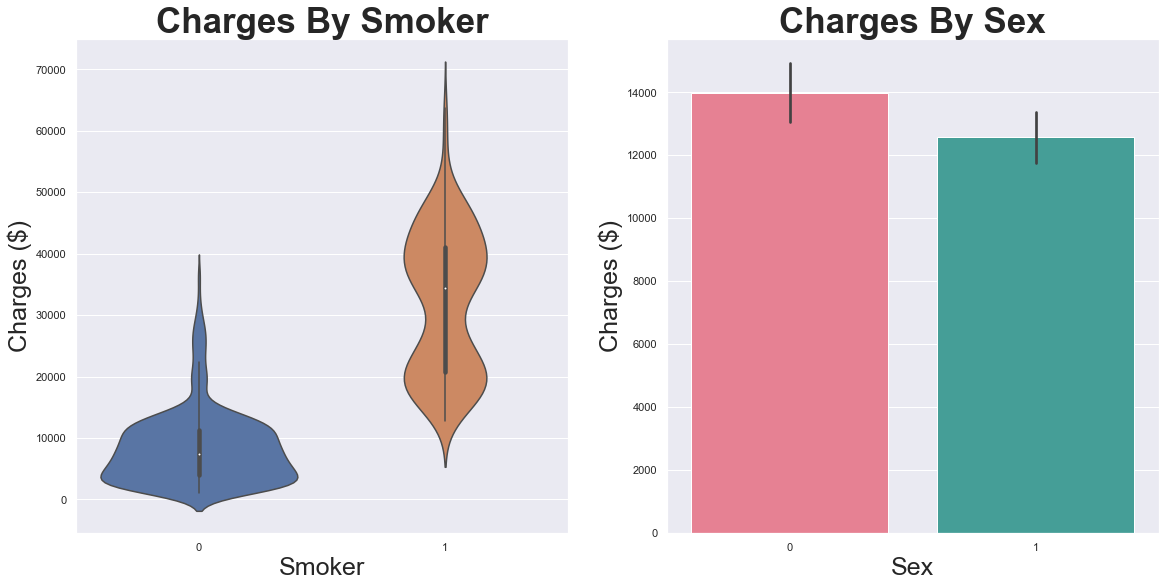

In [54]:
#plotting violinplot for charges by smoker
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
sns.set_style("darkgrid")
sns.violinplot(x = 'Smoker', y = 'Charges', data = df)
plt.xlabel('Smoker', fontsize=25)
plt.ylabel('Charges ($)', fontsize = 25)
plt.title('Charges By Smoker',fontweight="bold", size=35)
plt.title('Charges By Smoker',fontweight="bold", size=35)
#plotting barplot for charges by smoker
plt.subplot(2,3,2)
sns.set_style("darkgrid")
sns.barplot(x = 'Sex', y = 'Charges', data = df, palette= 'husl')
plt.xlabel('Sex', fontsize=25)
plt.ylabel('Charges ($)', fontsize = 25)
plt.title('Charges By Sex',fontweight="bold", size=35)

#### Observation:
   * People who smoke tend to have more Medical charges
   * Male tend to have more Medical charges than female
    

#### Question: Which region has maximum and minimum number of children?

<AxesSubplot:xlabel='Children', ylabel='count'>

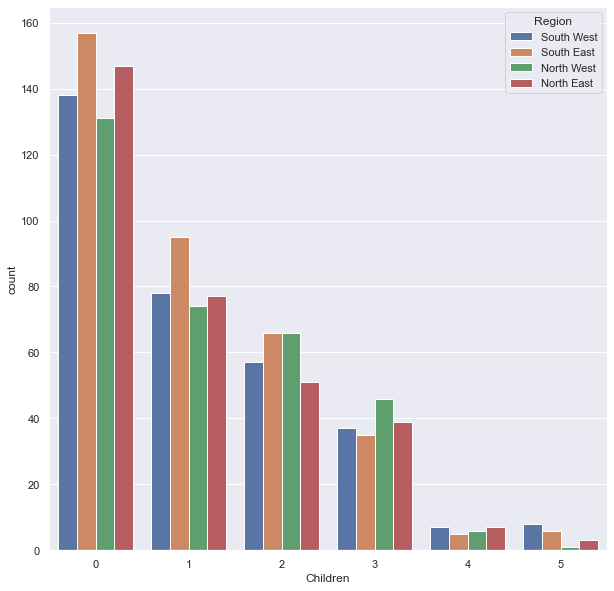

In [55]:
#plotting countplot for children with the hue of Region.
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.countplot(data = df,x = 'Children', hue = 'Region')

#### Observation:
* South-east and north east region have maximum people with no children.
* South-east and north west have same number of people with 1 children.
* North-west have maximum people with 3 childrens.
* South-east have 0 people with 5 children.
* South-west is on top of people with 4 and 5 children.

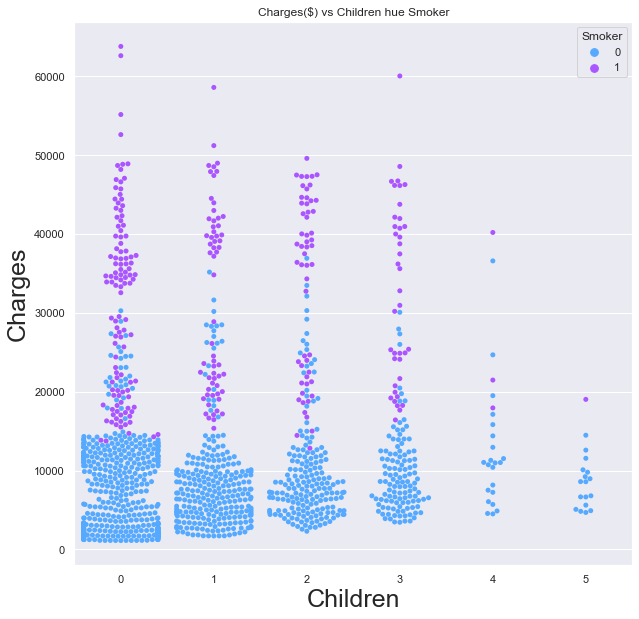

In [56]:
#plotting swarmplot for Charges by children with hue for Smoker.
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_style("darkgrid")
ax.set_ylabel('Charges', fontsize = 25)
ax.set_xlabel('Children', fontsize = 25)
ax.set_title('Charges($) vs Children hue Smoker')
ax = sns.swarmplot(x = 'Children', y = 'Charges', data=df,
                 orient='v', hue='Smoker', palette='cool')


#### Observation:
 * People who don't have children smoke more than people who have children and so there charges are more.

### EXPLORATORY DATA ANALYSIS

#### Correlation

In [57]:
#Computing correlation for dataframe df.
df.corr()

,Age,Sex,BMI,Children,Smoker,Charges
Age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.298308
Sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.058044
BMI,0.109344,-0.046397,1.000000,0.012755,0.003746,0.198401
Children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.067389
Smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.787234
Charges,0.298308,-0.058044,0.198401,0.067389,0.787234,1.000000


In [58]:
#plotting heatmap for dataframe correlation.
df.corr().iplot(kind="heatmap",
                   colorscale = 'purples',
                   dimensions=(700,500))

#### Observation
* Smoker and charges have strong relationship
* There is weak negative correlation between sex and Charges
* There is weak correlation  between Age,BMI and Charges

In [59]:
#Computing percentiles for charges.
np.percentile(df['Charges'],[25,50,75])

array([ 4746.344  ,  9386.1613 , 16657.71745])

In [60]:
#descriptive statistic for dataframe df.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
Sex,1337.0,0.495138,0.500163,0.0000,0.000,0.0000,1.00000,1.00000
BMI,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
Children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
Smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
Charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [61]:
#descriptive statistic for group South east region.
dfgroupSE.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,364.0,38.939560,14.164585,18.0000,26.7500,39.00000,51.0000,64.00000
Sex,364.0,0.480769,0.500318,0.0000,0.0000,0.00000,1.0000,1.00000
BMI,364.0,33.355989,6.477648,19.8000,28.5725,33.33000,37.8125,53.13000
Children,364.0,1.049451,1.177276,0.0000,0.0000,1.00000,2.0000,5.00000
Smoker,364.0,0.250000,0.433609,0.0000,0.0000,0.00000,0.2500,1.00000
Charges,364.0,14735.411438,13971.098589,1121.8739,4440.8862,9294.13195,19526.2869,63770.42801


In [62]:
#descriptive statistic for group South west region.
dfgroupSW.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,325.0,39.455385,13.959886,19.000,27.00,39.000,51.00,64.00000
Sex,325.0,0.498462,0.500769,0.000,0.00,0.000,1.00,1.00000
BMI,325.0,30.596615,5.691836,17.400,26.90,30.300,34.60,47.60000
Children,325.0,1.141538,1.275952,0.000,0.00,1.000,2.00,5.00000
Smoker,325.0,0.178462,0.383491,0.000,0.00,0.000,0.00,1.00000
Charges,325.0,12346.937377,11557.179101,1241.565,4751.07,8798.593,13462.52,52590.82939


In [63]:
#descriptive statistic for group North east region.
dfgroupNE.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,324.0,39.268519,14.069007,18.0000,27.000000,39.500000,51.00000,64.00000
Sex,324.0,0.496914,0.500764,0.0000,0.000000,0.000000,1.00000,1.00000
BMI,324.0,29.173503,5.937513,15.9600,24.866250,28.880000,32.89375,48.07000
Children,324.0,1.046296,1.198949,0.0000,0.000000,1.000000,2.00000,5.00000
Smoker,324.0,0.206790,0.405630,0.0000,0.000000,0.000000,0.00000,1.00000
Charges,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.36410,58571.07448


In [64]:
#descriptive statistic for group North west region.
dfgroupNW.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,324.0,39.259259,14.028302,19.0000,26.000000,39.00000,51.250000,64.00000
Sex,324.0,0.506173,0.500735,0.0000,0.000000,1.00000,1.000000,1.00000
BMI,324.0,29.195494,5.144127,17.3850,25.745000,28.88000,32.775000,42.94000
Children,324.0,1.151235,1.171897,0.0000,0.000000,1.00000,2.000000,5.00000
Smoker,324.0,0.179012,0.383956,0.0000,0.000000,0.00000,0.000000,1.00000
Charges,324.0,12450.840844,11073.125699,1621.3402,4733.635288,8976.97725,14788.747863,60021.39897


#### ECDF

In [65]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""


    # Number of data points: n
    n = len(data)


    # x-data for the ECDF: x
    x = np.sort(data)


    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n


    return x, y

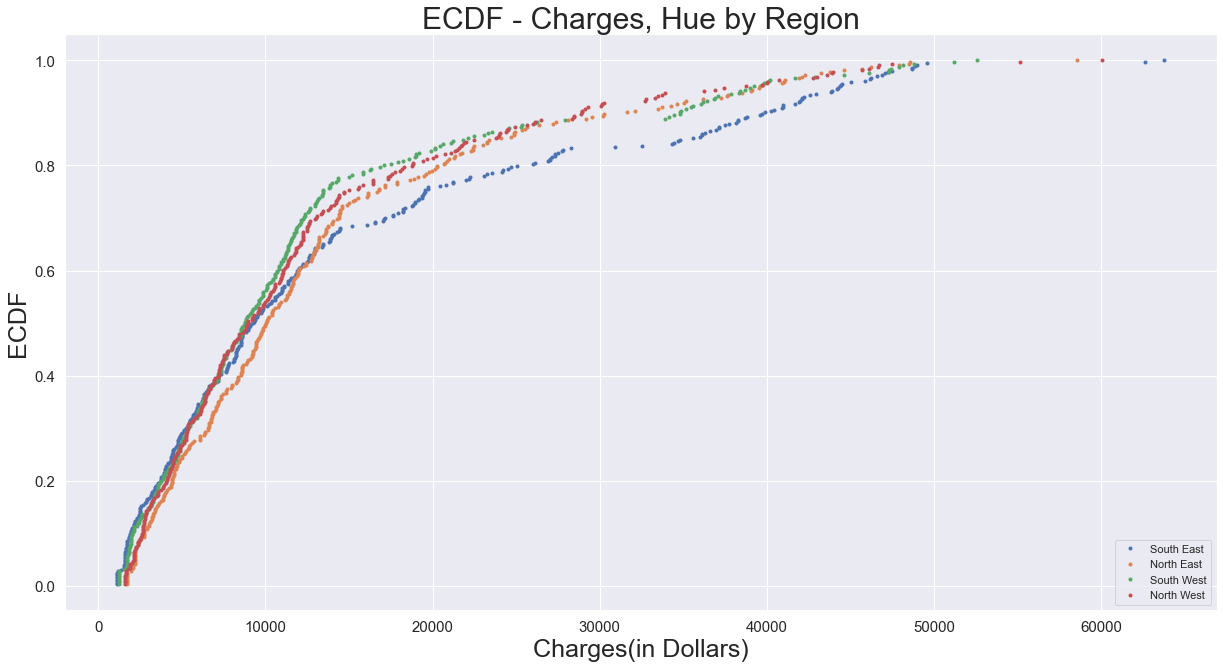

In [66]:
# Figure size and axis
fig = plt.figure(figsize=(20,10))
axes = fig.add_axes([0.1,0.1,0.8,0.8])

x_se, y_se = ecdf(dfgroupSE['Charges'])
x_ne, y_ne = ecdf(dfgroupNE['Charges'])
x_sw, y_sw = ecdf(dfgroupSW['Charges'])
x_nw, y_nw = ecdf(dfgroupNW['Charges'])


# Plot all ECDFs on the same plot
_ = plt.plot(x_se, y_se, marker = '.', linestyle = 'none')
_ = plt.plot(x_ne, y_ne, marker = '.', linestyle = 'none')
_ = plt.plot(x_sw, y_sw, marker = '.', linestyle = 'none')
_ = plt.plot(x_nw, y_nw, marker = '.', linestyle = 'none')

# Make nice margins
plt.margins(0.05)

# Annotation,Label, Tick, Title
plt.legend(('South East', 'North East', 'South West','North West'), loc='lower right')
_ = plt.xlabel('Charges(in Dollars)',fontsize = 25)
_ = plt.ylabel('ECDF',fontsize = 25)
plt.title('ECDF - Charges, Hue by Region', fontsize=30)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)


# Display the plot
plt.show()

#### Observation:
* 70% charges are between 10,000 to 20000 for all regions.
* South west have less charges out of all 4 regions.
* North West and North East are almost same.
* More than 75% people in South East have 20,000 charges.


### TESTING HYPOTHESIS AND ANNOVA

In [67]:
#making a dataframe named as annovadf for BMI,REGION,AGE,CHARGES.
annovadf = df[['Region','BMI','Age','Charges']]
annovadf.head(3)

,Region,BMI,Age,Charges
0,South West,27.90,19,16884.9240
1,South East,33.77,18,1725.5523
2,South East,33.00,28,4449.4620


In [68]:
#grouping annovadf by Region.
grouped_anova=annovadf.groupby(["Region"])

In [69]:
#Computing annova test for charges column of South east and south west region.
anova_result_1=stats.f_oneway(grouped_anova.get_group("South East")["Charges"], grouped_anova.get_group("South West")["Charges"])

print( "ANOVA results: F=",anova_result_1)

ANOVA results: F= F_onewayResult(statistic=5.8960452705730475, pvalue=0.015430651095692707)


#### Conclusion
* As the F-test score is small and p-value is less than 0.05 so there is evidence that The charges between South East and Northeast  are  significantly different. So the null hypothesis is  rejected.

In [70]:
# Computing annova test for charges column for Northeast and Northwest region.
anova_result_1=stats.f_oneway(grouped_anova.get_group("North East")["Charges"], grouped_anova.get_group("North West")["Charges"])

print( "ANOVA results: F=",anova_result_1)

ANOVA results: F= F_onewayResult(statistic=1.1866188531575284, pvalue=0.27641882562037406)


#### Conclusion
* As the F-test score is small and p-value is greater than 0.05 so there is  evidence that The charges between South West and North West  are not significantly different. so the null hypothesis is not rejected.

In [71]:
#use the stats.f_oneway method
#find the statistic F and P value calling the stats.f_oneway method from scipy
F, p = stats.f_oneway(dfgroupSW['Charges'],dfgroupNE['Charges'],dfgroupSE['Charges'],dfgroupNW['Charges'])
# pvalue < 0.05, at least one group does not have the same mean
if p < 0.05:
    print("reject null hypothesis: at least one group does not have the same mean")
else:
    print("accept null hypothesis: all the groups have the same mean")

reject null hypothesis: at least one group does not have the same mean


In [72]:
F, p = stats.f_oneway(dfgroupSE['Age'], dfgroupSW['Age'],dfgroupNE['Age'],dfgroupNW['Age'])
# pvalue < 0.05, at least one group does not have the same mean
if p < 0.05:
    print("reject null hypothesis: at least one group does not have the same mean")
else:
    print("accept null hypothesis: all the groups have the same mean")

accept null hypothesis: all the groups have the same mean


In [73]:
F, p = stats.f_oneway(dfgroupSE['BMI'], dfgroupSW['BMI'],dfgroupNE['BMI'],dfgroupNW['BMI'])
# pvalue < 0.05, at least one group does not have the same mean
if p < 0.05:
    print("reject null hypothesis: at least one group does not have the same mean")
else:
    print("accept null hypothesis: all the groups have the same mean")

reject null hypothesis: at least one group does not have the same mean


#### Chi-Squared Test

In [76]:
#See if Charges and Age of SouthEast region are dependent
from scipy.stats import chi2_contingency
chi2_df = dfgroupSE[['Charges', 'Age']]
stat, p, dof,expected = chi2_contingency(chi2_df)

# H0 = Charges and Age are independent
# Ha = Charges and Age are dependent

# print out results
print(f'The Test Statistic is {stat:.4f} with a P-value of {p:.4f}')
if p < 0.05:
    print('Since p-value is < 0.05, they are dependent.') # We Reject H0, statistically significant
else:
    print('Since p-value is > 0.05, they are independent')

The Test Statistic is 11463.3524 with a P-value of 0.0000
Since p-value is < 0.05, they are dependent.


#### Normal Test

In [77]:
#computing the normal test for charges column
normaltest(df['Charges'])

NormaltestResult(statistic=336.4416065386955, pvalue=8.762608303862979e-74)

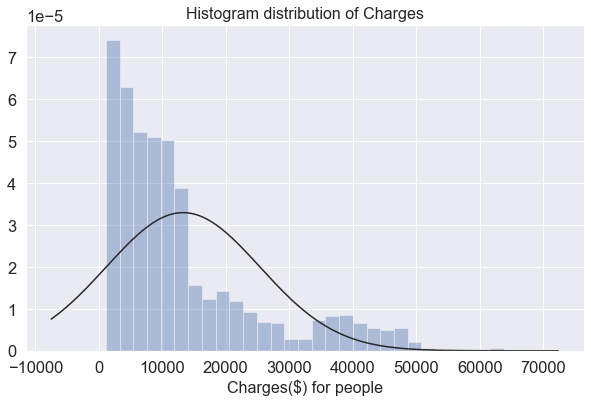

In [78]:
#plotting the distribution of Charges column.
plt.rcParams["figure.figsize"] = [10,6]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
sns.distplot(df['Charges'],fit=stats.norm,kde=False)
plt.title('Histogram distribution of Charges')
plt.xlabel('Charges($) for people')
plt.show()

#### Conclusion:
p-value is less than 0.05 so the null hypothesis can be rejected and as you can see in the plot the data is not normally distributed.

#### Pearson correlation coefficient.

In [79]:
# Calculate pearson coefficient and pvalue
pearson_coef, p_value = stats.pearsonr(df['Children'], df['Charges'])

# print out results
print(f'The Pearson Correlation Coefficient is {pearson_coef:.4f} with a P-value of {p_value:.4f}')
if p_value < 0.001:
    print('Since p-value is < 0.001, the correlation between Children and Charges is statistically significant, although the linear relationship isn\'t extreamely strong.')
else:
    print('Since p-value is > 0.001, the correlation between Children  and Charges is not statistically significant.') 

The Pearson Correlation Coefficient is 0.0674 with a P-value of 0.0137
Since p-value is > 0.001, the correlation between Children  and Charges is not statistically significant.


In [80]:
# Calculate pearson coefficient and pvalue
pearson_coef, p_value = stats.pearsonr(df['Smoker'], df['Charges'])

# print out results
print(f'The Pearson Correlation Coefficient is {pearson_coef:.4f} with a P-value of {p_value:.4f}')
if p_value < 0.001:
    print('Since p-value is < 0.001, the correlation between Smoker and Charges is statistically significant, although the linear relationship isn\'t extreamely strong.')
else:
    print('Since p-value is > 0.001, the correlation between Smoker and Charges is not statistically significant.')

The Pearson Correlation Coefficient is 0.7872 with a P-value of 0.0000
Since p-value is < 0.001, the correlation between Smoker and Charges is statistically significant, although the linear relationship isn't extreamely strong.


In [81]:
# Calculate pearson coefficient and pvalue
pearson_coef, p_value = stats.pearsonr(df['Age'], df['Charges'])

# print out results
print(f'The Pearson Correlation Coefficient is {pearson_coef:.4f} with a P-value of {p_value:.4f}')
if p_value < 0.001:
    print('Since p-value is < 0.001, the correlation between Age and Charges is statistically significant, although the linear relationship isn\'t extreamely strong.')
else:
    print('Since p-value is > 0.001, the correlation between Age and Charges is not statistically significant.')

The Pearson Correlation Coefficient is 0.2983 with a P-value of 0.0000
Since p-value is < 0.001, the correlation between Age and Charges is statistically significant, although the linear relationship isn't extreamely strong.


##### Z-Test

In [82]:
bygroup = df.groupby(['Region'])['Charges']

In [83]:
bygroup.head()

0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
11    27808.72510
12     1826.84300
15     1837.23700
16    10797.33620
17     2395.17155
18    10602.38500
19    36837.46700
20    13228.84695
24     6203.90175
Name: Charges, dtype: float64

In [84]:
bygroup.aggregate(['count',np.mean, np.std]).round(2)

,count,mean,std
Region,,,
North East,324,13406.38,11255.80
North West,324,12450.84,11073.13
South East,364,14735.41,13971.10
South West,325,12346.94,11557.18


Z-Test Hypothesis
-- Hypothesis and statistical test that assumes normal distribution to determine whether two population means are different. Variances are known and sample size is large.


* H0 : u <= u0
* South East Charges is higher than 15000 dollars
* H1 : u > u0
* South East charges is lower than 15000 dollars


Confidence Interval = 95%, since it is one tailed test, alpha = 0.05

##### Testing the hypothesis that the mean is 15000 against the alternative that it is SMALLER
* 𝐻0:𝜇>=𝜇0
* 𝐻1:𝜇<𝜇0

In [85]:
# Calculate test statistic and pvalue
(test_statistic, p_value) = ztest(df[df['Region'] == 'South East']['Charges'], value=15000, alternative='smaller',ddof=1)

# print out results
print(f'The Test Statistic is {test_statistic:.4f} with a P-value of {p_value:.4f}')
if p_value < 0.05:
    print('Since p-value is < 0.05, we do not retain the null hypothesis.')
else:
    print('Since p-value is > 0.05, we retain the null hypothesis')

The Test Statistic is -0.3613 with a P-value of 0.3589
Since p-value is > 0.05, we retain the null hypothesis


#### Summary and Conclusion:


* This is a data of 1338 people for medical insurance cost in which most of them have age below 20.
* Female smoke less than the male
* There are more young males than young females whereas there are more old female than young male
* If a person is smoker then his/her charges increased as smoking is is positively correlated with the charges.
* South east region have maximum number of people who smoke where as Northeast have less smokers out of 4 regions.
*  South east region have maximum people with 0 children.
* South east region have 0 people with 5 children.That mean this region have more young people.
* Children and charges have weak relationship.
* People who have no children smokes more may be that's why there charges are more
* Charges increased by Age as maybe because if person becomes old then eventually their charges increased.
* BMI  have little effect on charges as it has weak strong relationship with charges.
* Charges and sex have negative relationship.
* The data shows that having  more children does'nt increase charges.
* 70%  percent charges are between 10,000 to 20,000 in all the regions
* Out of All the four regions South east people  have more charges.
